In [ ]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, fit_intercept=True, copy_X=True,
                 eta0=0.001, epochs=1000, batch_size=1,
                 weight_decay=0.9, shuffle=True):
        self.fit_intercept = fit_intercept  # intercept 여부
        self.copy_X = copy_X  # 데이터를 복사할지 여부
        self._eta0 = eta0  # 초기 학습률
        self._epochs = epochs  # 학습할 epoch 수

        self._cost_history = []  # 비용 기록을 위한 리스트
        self._coef = None  # 회귀 계수
        self._intercept = None  # 절편
        self._new_X = None  # 데이터를 저장할 변수
        self._w_history = None  # 가중치 업데이트 기록
        self._weight_decay = weight_decay  # 학습률 감소율
        self._batch_size = batch_size  # 배치 크기
        self._is_SGD = shuffle  # 데이터를 섞을지 여부

    def gradient(self, X, y, theta):
        # 경사하강법을 위한 기울기 계산
        return ######## 코드 작성 ##########

    def fit(self, X, y):
        # 학습을 시작하는 함수
        self._new_X = np.array(X)  # X 데이터를 numpy 배열로 변환하여 저장
        y = y.reshape(-1, 1)  # y 데이터를 열 벡터로 변환
        if self.fit_intercept:  # intercept 추가 여부 확인
            intercept_vector = ######## 코드 작성 ##########  # 1로만 구성된 벡터
            self._new_X = np.concatenate((intercept_vector, self._new_X), axis=1)  # X에 상수항 추가

        theta_init = np.random.normal(0, 1, self._new_X.shape[1])  # 초기 theta 값 설정 (정규분포)
        self._w_history = [theta_init]  # 가중치 기록 초기화
        self._cost_history = [self.cost(self.hypothesis_function(self._new_X, theta_init), y)]  # 비용 기록 초기화

        theta = theta_init  # 초기 theta로 시작

        for epoch in range(self._epochs):  # 지정된 epoch 횟수만큼 학습 실행
            X_copy, y_copy = np.copy(self._new_X), np.copy(y)  # X와 y를 복사하여 수정하지 않도록 함

            if self._is_SGD:  # SGD(확률적 경사 하강법) 적용 여부
                indices = np.arange(len(X_copy))  # X_copy의 인덱스 생성
                ######## 코드 작성 ##########  # 인덱스를 무작위로 섞음
                X_copy, y_copy = X_copy[indices], y_copy[indices]  # X와 y를 섞은 인덱스로 재배치

            num_batches = len(X_copy) // self._batch_size  # 배치의 개수 계산

            for batch_count in range(num_batches):  # 배치마다 학습 실행
                start = ######## 코드 작성 ##########  # 배치의 시작 인덱스
                end = ######## 코드 작성 ##########  # 배치의 끝 인덱스

                X_batch = X_copy[start:end]  # 배치 크기에 맞는 X 데이터 추출
                y_batch = y_copy[start:end]  # 배치 크기에 맞는 y 데이터 추출

                gradient = self.gradient(X_batch, y_batch, theta).flatten()  # 배치에 대한 기울기 계산
                theta = theta - self._eta0 * gradient  # 경사하강법으로 theta 업데이트

            if epoch % 100 == 0:  # 100번째 epoch마다 가중치 기록과 비용 기록 추가
                self._w_history.append(theta)
                cost = self.cost(self.hypothesis_function(self._new_X, theta), y)  # 현재 모델의 비용 계산
                self._cost_history.append(cost)  # 비용 기록에 추가

            self._eta0 *= self._weight_decay  # 학습률을 weight_decay 비율로 감소시킴

        if self.fit_intercept:  # intercept이 존재하면 분리하여 저장
            self._intercept = theta[0]
            self._coef = theta[1:]
        else:  # intercept이 없으면 theta 그대로 사용
            self._coef = theta

    def cost(self, h, y):
        # 비용 함수 계산 (평균 제곱 오차)
        return 1 / (2 * len(y)) * np.sum((h - y).flatten() ** 2)

    def hypothesis_function(self, X, theta):
        # 예측 함수 (모델의 가설)
        return X.dot(theta).reshape(-1, 1)

    def predict(self, X):
        # 주어진 X에 대해 예측을 수행하는 함수
        test_X = np.array(X)

        if self.fit_intercept:  # intercept 추가 여부 확인
            intercept_vector = np.ones([len(test_X), 1])  # 1로만 구성된 벡터
            test_X = np.concatenate((intercept_vector, test_X), axis=1)  # X에 상수항 추가
            weights = np.concatenate(([self._intercept], self._coef), axis=0)  # weights에 intercept와 coef 결합
        else:
            weights = self._coef  # intercept 없이 coef만 사용

        return ######## 코드 작성 ##########  # 예측값 계산

    @property
    def coef(self):
        # 회귀 계수를 반환하는 프로퍼티
        return self._coef

    @property
    def intercept(self):
        # 절편을 반환하는 프로퍼티
        return self._intercept

    @property
    def weights_history(self):
        # 가중치 업데이트 기록을 반환하는 프로퍼티
        return np.array(self._w_history)

    @property
    def cost_history(self):
        # 비용 기록을 반환하는 프로퍼티
        return self._cost_history

In [6]:
!wget https://raw.githubusercontent.com/dankook-sw/DataMining/refs/heads/main/ch08/train.csv

--2025-03-18 06:36:03--  https://raw.githubusercontent.com/dankook-sw/DataMining/refs/heads/main/ch08/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11087 (11K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  10.83K  --.-KB/s    in 0.001s  

2025-03-18 06:36:04 (17.4 MB/s) - ‘train.csv’ saved [11087/11087]



In [3]:
!wget https://raw.githubusercontent.com/dankook-sw/DataMining/refs/heads/main/ch08/test.csv

--2025-03-18 06:33:55--  https://raw.githubusercontent.com/dankook-sw/DataMining/refs/heads/main/ch08/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4761 (4.6K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   4.65K  --.-KB/s    in 0s      

2025-03-18 06:33:55 (38.0 MB/s) - ‘test.csv’ saved [4761/4761]



In [13]:
!ls /content/

sample_data  test.csv  train.csv


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/train.csv")

X = df["x"].values.reshape(-1,1)
y = df["y"].values

epoch = 10
eta = 0.01
gd_lr = LinearRegressionGD(eta0=eta, epochs=epoch, batch_size=1, shuffle=False)
bgd_lr = LinearRegressionGD(eta0=eta, epochs=epoch, batch_size=len(X), shuffle=False)
sgd_lr = LinearRegressionGD(eta0=eta, epochs=epoch, batch_size=1, shuffle=True)
msgd_lr = LinearRegressionGD(eta0=eta, epochs=epoch, batch_size=20, shuffle=True)

In [49]:
gd_lr.fit(X, y)
bgd_lr.fit(X, y)
sgd_lr.fit(X, y)
msgd_lr.fit(X, y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


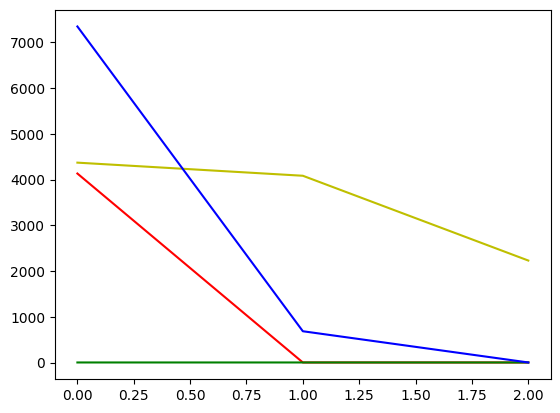

In [50]:
import matplotlib.pyplot as plt

plt.plot(range(len(gd_lr.cost_history)), gd_lr.cost_history, c="r")
plt.plot(range(len(bgd_lr.cost_history)), bgd_lr.cost_history, c="y")
plt.plot(range(len(sgd_lr.cost_history)), sgd_lr.cost_history, c="g")
plt.plot(range(len(msgd_lr.cost_history)), msgd_lr.cost_history, c="b")